In [8]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

In [9]:
wea=pd.read_csv("weather.csv")

In [10]:
wea.shape

(2190, 10)

In [11]:
print(wea.columns)

Index(['date', 'max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall',
       'snow_depth', 'location', 'latitude', 'longitude'],
      dtype='object')


In [5]:
wea.isnull().sum()

date             0
max_temp         0
min_temp         0
avg_temp         0
precipitation    0
snowfall         0
snow_depth       0
location         0
latitude         0
longitude        0
dtype: int64

In [7]:
wea.avg_temp.describe()

count    2190.000000
mean       55.467580
std        18.343926
min        10.500000
25%        41.000000
50%        58.000000
75%        72.000000
max        89.000000
Name: avg_temp, dtype: float64

In [8]:
wea.avg_temp.quantile(.333)

47.0

In [9]:
wea.avg_temp.quantile(.666)

67.0

In [13]:
wea["estacion"]=wea.latitude.astype(str) + wea.longitude.astype(str)

In [14]:
print(wea.columns)

Index(['date', 'max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall',
       'snow_depth', 'location', 'latitude', 'longitude', 'estacion'],
      dtype='object')


In [26]:
wea.head(5)

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,estacion
0,1/1/14,34,24,29.0,0,0,0,JFK,40.64749,-73.779982,40.647490000000005-73.7799821
1,1/2/14,33,19,26.0,0.13,2.4,0,JFK,40.64749,-73.779982,40.647490000000005-73.7799821
2,1/3/14,19,9,14.0,0.22,5.5,7,JFK,40.64749,-73.779982,40.647490000000005-73.7799821
3,1/4/14,31,3,17.0,0,0,7,JFK,40.64749,-73.779982,40.647490000000005-73.7799821
4,1/5/14,49,23,36.0,0.1,,6,JFK,40.64749,-73.779982,40.647490000000005-73.7799821


In [18]:
pd.value_counts(wea["location"])

JFK             730
LGA             730
Central Park    730
Name: location, dtype: int64

In [20]:
print(wea.columns)

Index(['date', 'max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall',
       'snow_depth', 'location', 'latitude', 'longitude', 'estacion'],
      dtype='object')


In [117]:
wea.tail()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,estacion,estacionC
2185,12/27/15,61,46,53.5,0.12,0,0,Central Park,40.771133,-73.974187,40.7711329-73.9741874,Estacion 3
2186,12/28/15,46,34,40.0,0.03,,0,Central Park,40.771133,-73.974187,40.7711329-73.9741874,Estacion 3
2187,12/29/15,46,34,40.0,0.45,,0,Central Park,40.771133,-73.974187,40.7711329-73.9741874,Estacion 3
2188,12/30/15,48,38,43.0,0.19,0,0,Central Park,40.771133,-73.974187,40.7711329-73.9741874,Estacion 3
2189,12/31/15,48,42,45.0,0.03,0,0,Central Park,40.771133,-73.974187,40.7711329-73.9741874,Estacion 3


In [54]:
#wea.date,wea.groupby('date')["avg_temp"].mean()

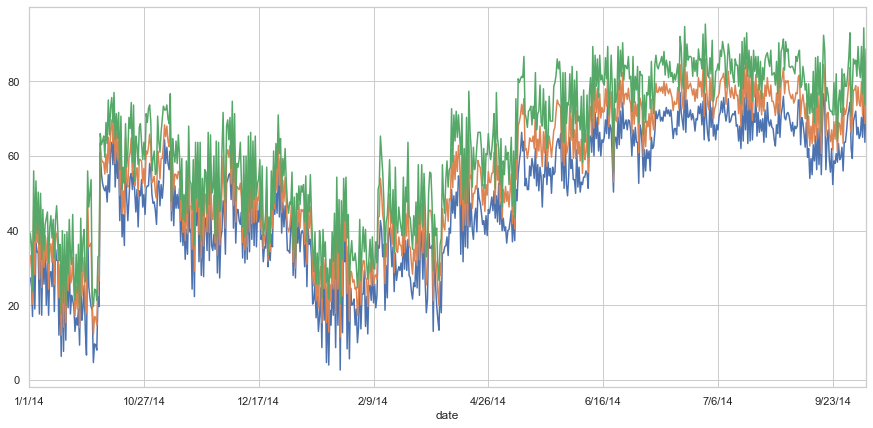

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
wea.groupby('date')["min_temp"].mean().plot(ax=ax)
wea.groupby('date')["avg_temp"].mean().plot(ax=ax)
wea.groupby('date')["max_temp"].mean().plot(ax=ax)

In [21]:
wea.groupby(["date","location"])["avg_temp"].mean()

date     location    
1/1/14   Central Park    28.5
         JFK             29.0
         LGA             29.0
1/1/15   Central Park    33.0
         JFK             34.0
         LGA             33.0
1/10/14  Central Park    33.5
         JFK             31.0
         LGA             31.0
1/10/15  Central Park    19.5
         JFK             21.0
         LGA             20.5
1/11/14  Central Park    47.5
         JFK             46.0
         LGA             45.0
1/11/15  Central Park    27.5
         JFK             29.0
         LGA             28.0
1/12/14  Central Park    46.0
         JFK             42.5
         LGA             46.5
1/12/15  Central Park    37.0
         JFK             37.0
         LGA             36.5
1/13/14  Central Park    44.0
         JFK             40.0
         LGA             42.5
1/13/15  Central Park    26.5
         JFK             28.0
         LGA             26.5
                         ... 
9/5/14   Central Park    79.5
         JFK      

In [22]:
wea.groupby(["estacion","location"])["avg_temp"].mean()

estacion                       location    
40.647490000000005-73.7799821  JFK             55.091781
40.7711329-73.9741874          Central Park    55.668493
40.7769271-73.87396590000002   LGA             55.642466
Name: avg_temp, dtype: float64

In [27]:
temperatura_dia=wea.groupby(["date"])["avg_temp"].mean()

In [28]:
temperatura_dia.columns = ['date','avg_temp']

In [108]:
temperatura_dia.head(3)

date
1/1/14     28.833333
1/1/15     33.333333
1/10/14    31.833333
Name: avg_temp, dtype: float64

In [89]:
print(temperatura_dia.columns)

['date', 'avg_temp']


In [29]:
temperatura_dia = pd.DataFrame(temperatura_dia)

In [30]:
temperatura_dia.head()

,avg_temp
date,
1/1/14,28.833333
1/1/15,33.333333
1/10/14,31.833333
1/10/15,20.333333
1/11/14,46.166667


In [31]:
temperatura_dia.to_csv("temperatura_dia.csv")

In [25]:
tempdia=wea.groupby(["date"])["avg_temp"].mean()

date
1/1/14     28.833333
1/1/15     33.333333
1/10/14    31.833333
1/10/15    20.333333
1/11/14    46.166667
1/11/15    28.166667
1/12/14    45.000000
1/12/15    36.833333
1/13/14    42.166667
1/13/15    27.000000
1/14/14    46.666667
1/14/15    24.833333
1/15/14    40.666667
1/15/15    30.166667
1/16/14    38.666667
1/16/15    31.666667
1/17/14    38.166667
1/17/15    24.333333
1/18/14    34.666667
1/18/15    36.500000
1/19/14    31.500000
1/19/15    39.500000
1/2/14     25.500000
1/2/15     39.000000
1/20/14    39.333333
1/20/15    36.166667
1/21/14    22.000000
1/21/15    30.833333
1/22/14    12.000000
1/22/15    35.500000
             ...    
9/23/14    61.666667
9/23/15    69.166667
9/24/14    64.500000
9/24/15    71.333333
9/25/14    61.166667
9/25/15    69.000000
9/26/14    68.333333
9/26/15    65.666667
9/27/14    72.833333
9/27/15    63.333333
9/28/14    72.833333
9/28/15    71.166667
9/29/14    72.666667
9/29/15    76.333333
9/3/14     79.500000
9/3/15     83.666667
9/30/14 